In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

E:\conda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
E:\conda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.neural_network import MLPClassifier

In [4]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
mlp = MLPClassifier(random_state=42).fit(X_train,y_train)
print("Accuracy on training set:{:.2f}".format(mlp.score(X_train,y_train)))
print("Accuracy on test set:{:.2f}".format(mlp.score(X_test,y_test)))

Accuracy on training set:0.94
Accuracy on test set:0.92


In [5]:
#计算每个特征的平均值
mean_on_train = X_train.mean(axis=0)
#计算每个特征标准差
std_on_train = X_train.std(axis=0)

#减去平均值，乘标准差的倒数
#mean=0，std=1
X_train_scaled = (X_train - mean_on_train)/std_on_train
#对测试集做相同变换（使用训练集的平均值和标准差）
X_test_scaled = (X_test - mean_on_train)/std_on_train

mlp = MLPClassifier(random_state=0).fit(X_train_scaled,y_train)
print("Accuracy on training set:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set:0.991
Accuracy on test set:0.965


E:\conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [6]:
mlp = MLPClassifier(max_iter=1000,random_state=0).fit(X_train_scaled,y_train)
print("Accuracy on training set:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.972


In [7]:
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=0).fit(X_train_scaled,y_train)
print("Accuracy on training set:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.972


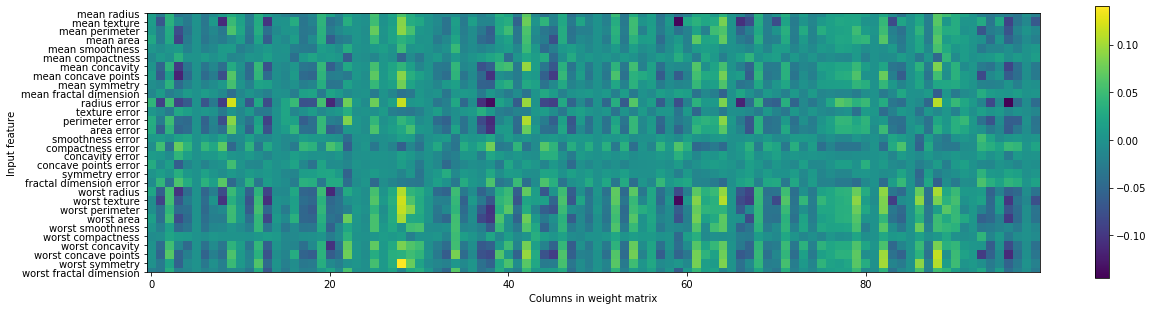

In [9]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [ ]:
#如果一个特征对所有隐单元权重都较小，那它可能不太重要
#keras,lasagna,tensorflow
#获取大量数据中包含的信息，构建极为复杂的模型
#训练时间长，仔细的预处理，在“均匀”的数据上表现较好
#如果类别不同，树的模型可能更合适
#层数和每层的隐单元个数，每层的结点个数通常与输入特征个数接近，几千个结点时不会低于特征个数
#权重个数包括输入层与隐层相乘，加上隐层与输出层
#常用调参方法，创建一个大的足以过拟合的网络，要么缩小网络，要么增大alpha增强正则化
#solver默认adam对数据缩放敏感，lbfgs鲁棒性好，大数据集训练时间长

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X,y = make_circles(noise=.25,factor=.5,random_state=1)
#重命名类别为blue和red
y_named = np.array(["blue","red"])[y]
#我们可以对任意个数组调用train_test_split，所有数组划分方式一致
X_train,X_test,y_train_named,y_test_named,y_train,y_test = train_test_split(X,y_named,y,random_state=0)
#构建梯度提升模型
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [11]:
print("X_test.shape:{}".format(X_test.shape))
print("Decision function shape:{}".format(gbrt.decision_function(X_test).shape))

X_test.shape:(25, 2)
Decision function shape:(25,)


In [12]:
#显示decision_function的前几个元素
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [13]:
#仅查看决策函数正负号再现预测值
print("Thtrsholded decision function:\n{}".format(gbrt.decision_function(X_test)>0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thtrsholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [14]:
#反类为classes_属性第一个元素
#将布尔值转换成0/1
greater_zero = (gbrt.decision_function(X_test)>0).astype(int)
#利用0/1作为classes_的索引
pred = gbrt.classes_[greater_zero]
#pred与gbrt.predict输出相同
print("pred is equal to predictions:{}".format(np.all(pred==gbrt.predict(X_test))))

pred is equal to predictions:True


In [15]:
decision_function = gbrt.decision_function(X_test)
print("decision function minimum:{:.2f} maximum:{:.2f}".format(np.min(decision_function),np.max(decision_function)))

decision function minimum:-7.69 maximum:4.29


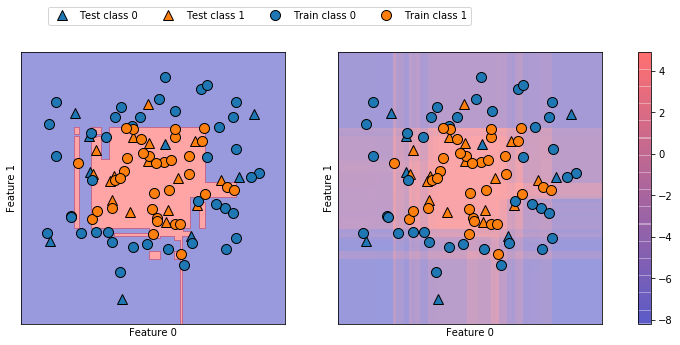

In [17]:
#由于可以任意缩放，decision——function的输出难以解释
fig,axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt,X,alpha=.4,cm=mglearn.ReBl)
for ax in axes:
    #画出训练点和测试点
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["Test class 0","Test class 1","Train class 0","Train class 1"],ncol=4,loc=(.1,1.1))

In [18]:
print("shape of probabilities:{}".format(gbrt.predict_proba(X_test).shape))

shape of probabilities:(25, 2)


In [19]:
#显示predict——proba的前几个元素
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


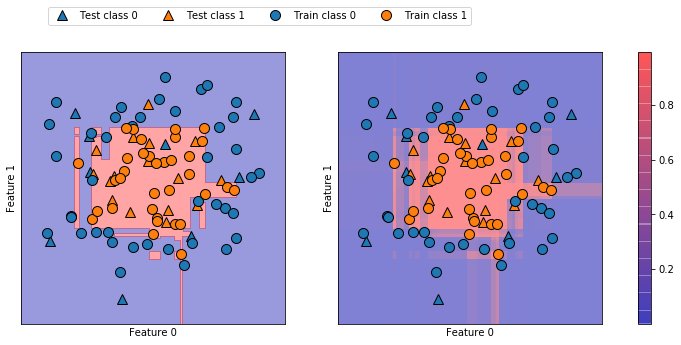

In [20]:
fig,axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt,X,alpha=.5,cm=mglearn.ReBl,function='predict_proba')
for ax in axes:
    #画出训练点和测试点
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["Test class 0","Test class 1","Train class 0","Train class 1"],ncol=4,loc=(.1,1.1))

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=42)
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)
print("Decision function shape:{}".format(gbrt.decision_function(X_test).shape))
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6,:]))

Decision function shape:(38, 3)
Decision function:
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [29]:
print("Argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(X_test),axis=1)))
print("predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [30]:
#显示前几个元素
print("predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("sums:\n{}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

predicted probabilities:
[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
sums:
[1. 1. 1. 1. 1. 1.]


In [31]:
print("Argmax of predicted probabilities:\n{}".format(np.argmax(gbrt.predict_proba(X_test),axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#用iris数据集的类别名称来表示每一个目标值
named_target = iris.target_names[y_train]
logreg.fit(X_train,named_target)
print("unique classes in training data:{}".format(logreg.classes_))
print("predictions:{}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test),axis=1)
print("argmax of decision function:{}".format(argmax_dec_func[:10]))
print("argmax combined with classes_:{}".format(logreg.classes_[argmax_dec_func][:10]))

unique classes in training data:['setosa' 'versicolor' 'virginica']
predictions:['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function:[1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_:['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


E:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
